In [449]:
%matplotlib inline
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from env import host, user, password
import warnings
warnings.filterwarnings('ignore')

### 1.) Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [325]:
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




- On average, which manufacturer has the best miles per gallon?


In [326]:
city = mpg.cty
highway = mpg.hwy

average_mpg = (city + highway) / 2
average_mpg
mpg = mpg.assign(avg_mpg=average_mpg)

mpg.groupby('manufacturer').avg_mpg.agg([ 'mean'])
# honda

,mean
manufacturer,
audi,22.027778
chevrolet,18.447368
dodge,15.540541
ford,16.680000
honda,28.500000
hyundai,22.750000
jeep,15.562500
land rover,14.000000
lincoln,14.166667


- How many different manufacturers are there?

In [251]:
len(mpg.manufacturer.unique())

15

- How many different models are there?

In [252]:
len(mpg.model.unique())

38

- Do automatic or manual cars have better miles per gallon?

In [88]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
174,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv,17.5
135,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv,14.0
45,dodge,caravan 2wd,3.8,1999,6,auto(l4),f,15,22,r,minivan,18.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
104,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0


In [391]:


mpg.groupby(['trans']).avg_mpg.max().sort_values().tail(1)

trans
manual(m5)    39.5
Name: avg_mpg, dtype: float64

### 2.) Joining and Merging

Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [327]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [99]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


- left join

In [254]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


- right join

In [328]:
pd.merge(users, roles, left_on='role_id', right_on='id', how="right")

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


- inner join

In [329]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='inner')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


### 3.) Getting data from SQL databases

a.) Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [330]:
#def get_db_url(username, hostname, password, database_name):
#    print(f"fromprotocol://[{username}[:{password}]@]{hostname}/[{database_name}]")
    
def get_db_url(username, hostname, password, database_name):
    print("url = f'mysql+pymysql://" + "{user}:{password}@{host}/" + f'{database_name}\'')
    
    
    
    
    
    

b.) Use your function to obtain a connection to the employees database.

In [417]:
from env import host, user, password
get_db_url("curie_944", "codeup database", "A6LUTZA9MPbUSy89niNy0Fd9qyI2tF8h", "employees")
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)    

url = f'mysql+pymysql://{user}:{password}@{host}/employees'


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


c.) Once you have successfully run a query:
- Intentionally make a typo in the database url. What kind of error message do you see?

In [418]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url) 

#operational error

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


- Intentionally make an error in your SQL query. What does the error message look like?

In [358]:
pd.read_sql('SELECT * FROM employees LIMT 5 OFFSET 50', url)
#programming error

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5 OFFSET 50' at line 1")
[SQL: SELECT * FROM employees LIMT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/f405)

d.) Read the employees and titles tables into two separate dataframes

In [340]:
sql = '''
SELECT
    *
FROM employees
LIMIT 5
OFFSET 200
'''

sql2 = '''
SELECT *
FROM titles
LIMIT 5
OFFSET 200
'''

employees = pd.read_sql(sql, url)
titles = pd.read_sql(sql2, url)

print(employees)
print(titles)

   emp_no  birth_date first_name    last_name gender   hire_date
0   10201  1956-12-15      Idoia      Kavraki      F  1986-11-22
1   10202  1956-01-05     Greger     Lichtner      M  1991-10-06
2   10203  1955-07-27      Steen      Escriba      M  1989-04-06
3   10204  1956-12-09      Nevio       Ritcey      F  1986-12-04
4   10205  1953-05-20     Mabhin  Leijenhorst      F  1993-08-23
   emp_no         title   from_date     to_date
0   10136  Senior Staff  1997-06-13  1999-09-20
1   10136         Staff  1988-06-13  1997-06-13
2   10137  Senior Staff  1994-02-18  9999-01-01
3   10137         Staff  1985-02-18  1994-02-18
4   10138      Engineer  1992-03-03  2001-03-03


e.) Visualize the number of employees with each title.

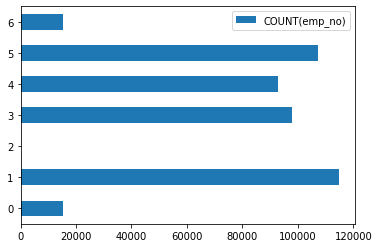

In [451]:
sql3 = '''
SELECT 
COUNT(emp_no), title 
FROM titles
JOIN employees USING(emp_no)
GROUP BY title
'''


employees_titles = pd.read_sql(sql3, url)
title_names = ["Assistant Manager", "Engineer", "Manager", "Senior Engineer", "Senior Staff", "Staff", "Technique Leader"]

employees_titles.plot.barh()
plt.show()


In [342]:
sql3 = '''
SELECT 
COUNT(emp_no), title 
FROM titles
JOIN employees USING(emp_no)
GROUP BY title
'''

employees_titles = pd.read_sql(sql3, url)

employees_titles

,COUNT(emp_no),title
0,15128,Assistant Engineer
1,115003,Engineer
2,24,Manager
3,97750,Senior Engineer
4,92853,Senior Staff
5,107391,Staff
6,15159,Technique Leader


f.) Join the employees and titles dataframes together.

In [343]:
sql3 = '''
SELECT 
* 
FROM titles
JOIN employees USING(emp_no)
limit 5
OFFSET 200
'''


employees_titles_join = pd.read_sql(sql3, url)

employees_titles_join

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10136,Senior Staff,1997-06-13,1999-09-20,1961-09-14,Zissis,Pintelas,M,1986-02-11
1,10136,Staff,1988-06-13,1997-06-13,1961-09-14,Zissis,Pintelas,M,1986-02-11
2,10137,Senior Staff,1994-02-18,9999-01-01,1959-07-30,Maren,Hutton,M,1985-02-18
3,10137,Staff,1985-02-18,1994-02-18,1959-07-30,Maren,Hutton,M,1985-02-18
4,10138,Engineer,1992-03-03,2001-03-03,1955-04-24,Perry,Shimshoni,M,1986-09-18


g.) Visualize how frequently employees change titles.


TypeError: datetime.date(1995, 12, 1) is not a string

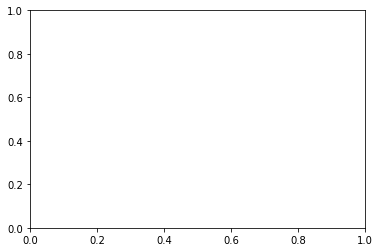

In [448]:

sql_query = '''
SELECT 
    title, to_date
FROM employees
LEFT JOIN titles USING(emp_no)
where to_date < "9999"
'''


changing_titles = pd.read_sql(sql_query, url)




plt.hist(changing_titles)
plt.show()




h.) For each title, find the hire date of the employee that was hired most recently with that title.

i.) Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

### 4.) Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

- What is the total price for each order?

In [388]:
from env import user, password, host
get_db_url("curie_944", "codeup database", "A6LUTZA9MPbUSy89niNy0Fd9qyI2tF8h", "chipotle")

chip_url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
    
chip = pd.read_sql('select * from orders limit 5', chip_url)   


total_price = pd.read_sql('SELECT count(item_price) from orders', chip_url)
total_price

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'


,count(item_price)
0,4622


- What are the most popular 3 items?


In [408]:
chipotle = '''
SELECT 
    item_name, count(item_name) as count
FROM orders
GROUP BY item_name;
'''
popularity = pd.read_sql(chipotle, chip_url)
popularity
popularity.sort_values('count').tail(3)

,item_name,count
25,Chips and Guacamole,479
18,Chicken Burrito,553
17,Chicken Bowl,726


- Which item has produced the most revenue?

In [413]:
revenue = '''
select
    item_name, count(item_price) as revenue
from orders
group by item_name
'''

total_rev = pd.read_sql(revenue, chip_url)

total_rev.sort_values('revenue').tail(1)

,item_name,revenue
17,Chicken Bowl,726
